In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
pd.DataFrame(df.isnull().sum(), columns=['Sum of null values']).T

,TV,Radio,Newspaper,Sales
Sum of null values,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split

x = df[['TV']]
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, random_state= 50)

In [8]:
x.values

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [10]:
z = df['TV']
z

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train.values,y_train)

LinearRegression()

In [13]:
b0= round(model.intercept_,2)
b1= round(model.coef_[0])

print(f'intercept: {b0}\ncoef: {b1}')

intercept: 6.89
coef: 0.06


In [18]:
tv_adv = [[200]]

pred = model.predict(tv_adv)

print('Prediction = ',pred[0])

Prediction =  18.232417203139306


In [20]:
a = tv_adv

pred2 = b0 + b1 * a[0][0]

print('Prediction = ', pred2)

Prediction =  18.89


In [21]:
b0= model.intercept_
b1= model.coef_[0]
a = tv_adv

pred3 = b0 + b1 * a[0][0]

print('Prediction = ', pred3)

Prediction =  18.232417203139306


In [23]:
x_test

,TV
112,175.7
165,234.5
12,23.8
73,129.4
144,96.2
20,218.4
199,232.1
8,8.6
39,228.0
88,88.3


In [24]:
y_pred = model.predict(x_test.values)

y_pred

array([16.85430492, 20.18899637,  8.23968537, 14.22851898, 12.34566599,
       19.27592609, 20.05288651,  7.37765629, 19.82036551, 11.89763771,
       20.48957229, 16.9280311 , 19.18518619, 16.67282512, 21.79962965,
       14.55745113, 13.75213448, 19.83737924,  9.32856421, 14.35895759,
       13.11695516, 11.160376  , 10.42311429, 19.50277585, 22.41212399,
       10.76906017, 12.01673384, 12.31730977, 17.37605937, 18.61806179,
       13.87123061, 15.38545274,  7.84836953, 18.09630735, 11.22275968,
        9.42497535, 12.71429684, 21.78828716, 11.83525403, 11.22275968])

In [27]:
differ = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
differ.head()

,Actual,Predicted
112,17.1,16.854305
165,16.9,20.188996
12,9.2,8.239685
73,11.0,14.228519
144,12.3,12.345666


In [31]:
from sklearn import metrics
import numpy as np

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('mae = ', mae.round(2))
print('mse = ', mse.round(2))
print('rmse = ', rmse.round(2))

mae =  1.74
mse =  4.66
rmse =  2.16


<Axes: xlabel='Sales'>

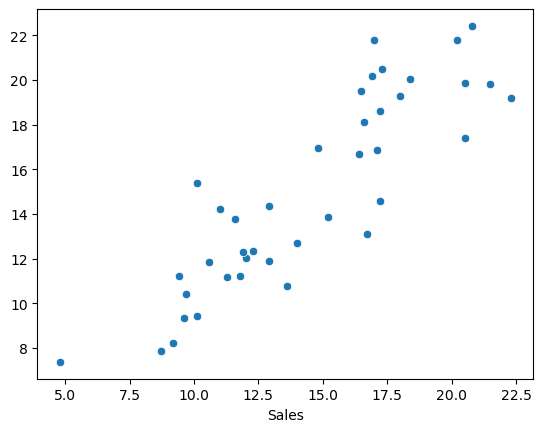

In [33]:
sns.scatterplot(x = y_test, y = y_pred)

<Axes: xlabel='Sales'>

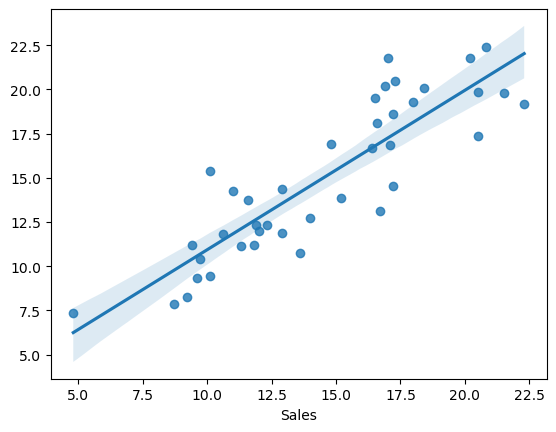

In [34]:
sns.regplot(x = y_test, y = y_pred)